## Employee Exit Survey: Clean and Analyze
### Which set of employees tend to exit early?
In this project, I'll be playing the role of data analyst working for a company whose stakeholders want `understand why certain group of employees are exiting the firm`. I'll be answering the following questions in the course of my analysis:
- Are employees who only worked for the institutes for a short period of time, resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

I'll be working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia, as both used the same survey template. You can find the DETE exit survey [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) and the TAFE survey [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey). 

I'll combine and analyze the results for both surveys to answer the questions I mentioned earlier. Let's begin!

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 100

## Explore Datasets

In [2]:
#load datasets
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv', encoding='cp1252')

In [3]:
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [5]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Main Factor. Which of these was the main factor for leaving?,InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction,InstituteViews. Topic:2. I was given access to skills training to help me do my job better,InstituteViews. Topic:3. I was given adequate opportunities for personal development,InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%,InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had,InstituteViews. Topic:6. The organisation recognised when staff did good work,InstituteViews. Topic:7. Management was generally supportive of me,InstituteViews. Topic:8. Management was generally supportive of my team,InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me,InstituteViews. Topic:10. Staff morale was positive within the Institute,InstituteViews. Topic:11. If I had a workplace issue it was dealt with quickly,InstituteViews. Topic:12. If I had a workplace issue it was dealt with efficiently,InstituteViews. Topic:13. If I had a workplace issue it was dealt with discreetly,WorkUnitViews. Topic:14. I was satisfied with the quality of the management and supervision within my work unit,WorkUnitViews. Topic:15. I worked well with my colleagues,WorkUnitViews. Topic:16. My job was challenging and interesting,WorkUnitViews. Topic:17. I was encouraged to use my initiative in the course of my work,WorkUnitViews. Topic:18. I had sufficient contact with other people in my job,WorkUnitViews. Topic:19. I was given adequate support and co-operation by my peers to enable me to do my job,WorkUnitViews. Topic:20. I was able to use the full range of my skills in my job,WorkUnitViews. Topic:21. I was able to use the full range of my abilities in my job. ; Category:Level of Agreement; Question:YOUR VIEWS ABOUT YOUR WORK UNIT],WorkUnitViews. Topic:22. I was able to use the full range of my knowledge in my job,WorkUnitViews. Topic:23. My job provided sufficient variety,WorkUnitViews. Topic:24. I was able to cope with the level of stress and pressure in my job,WorkUnitViews. Topic:25. My job allowed me to balance the demands of work and family to my satisfaction,WorkUnitViews. Topic:26. My supervisor gave me adequate personal recognition and feedback on my performance,"WorkUnitViews. Topic:27. My working environment was satisfactory e.g. sufficient space, good lighting, suitable seating and working area",WorkUnitViews. Topic:28. I was given the opportunity to mentor and coach others in order for me to pass on my skills and knowledge prior to my cessation date,WorkUnitViews. Topic:29. There was adequate communication between staff in my unit,WorkUnitViews. Topic:30. Staff morale was positive within my work unit,Induction. Did you undertake Workplace Induction?,InductionInfo. Topic:Did you undertake a Corporate Induction?,InductionInfo. Topic:Did you undertake a Institute Induction?,InductionInfo. Topic: Did you undertake Team Induction?,InductionInfo. Face to Face Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. On-line Topic:Did you undertake a Corporate Induction; Category:How it was conducted?,InductionInfo. Induction Manual Topic:Did you undertake a Corporate Induction?,InductionInfo. Face to Face Topic:Did you undertake a Institute Induction?,InductionInfo. On-line Topic:Did you undertake a Institute Induction?

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

Going by the results above, there is a lot of cleaning to do, as:
- Some missing value in the dete_survey dataframe are reperesented as 'Not Stated', rather than as NaN.
- Both the dete_survey and tafe_survey dataframes contain a number of columns that are redundant to this analysis
- Each dataframe contains many of the same columns, just that the column names are different.
- There are multiple columns that indicate an employee resigned because they were dissatisfied.

    To start, I'll handle the first two issues.

## Clean Datasets

### Drop Unnecessary Columns
Looking through the `dete_survey` dataframe, the columns `"Professional Development"` through to `"Health & Safety"` seem redundant to this analyis - as they are similar to the columns `"Career move to public sector"` through to `"Wrokload"`. Hence, I'll be dropping them.

The irrelevance in this analysis is why I'll also be dropping the survey questions `"Main Factor. Which of these was the main factor for leaving?"` through to `"Workplace. Topic:Would you recommend the Institute as an employer to others?"` in the `tefe_survey` dataframe

In [7]:
#reload the dete survey, this time telling pandas to read 'Not Started' values as NaN
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,Career move to public sector,Career move to private sector,Interpersonal conflicts,Job dissatisfaction,Dissatisfaction with the department,Physical work environment,Lack of recognition,Lack of job security,Work location,Employment conditions,Maternity/family,Relocation,Study/Travel,Ill Health,Traumatic incident,Work life balance,Workload,None of the above,Professional Development,Opportunities for promotion,Staff morale,Workplace issue,Physical environment,Worklife balance,Stress and pressure support,Performance of supervisor,Peer support,Initiative,Skills,Coach,Career Aspirations,Feedback,Further PD,Communication,My say,Information,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,A,A,N,N,N,A,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,A,N,N,N,N,A,A,A,N,N,N,A,A,A,N,A,A,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,A,A,N,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,A,N,N,N,A,A,N,N,A,A,A,A,A,A,A,A,A,A,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,A,A,N,N,D,D,N,A,A,A,A,A,A,SA,SA,D,D,A,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
# Remove redundant columns 
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Confirm the columns were dropped
print(dete_survey_updated.columns, tafe_survey_updated.columns, sep='\n\n')

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Fac

As both datasets now contain only columns that relevant to this analysis, the next task will be to adjust the column names in both datasets

### Clean Column Names
Each dataframe contains many of the same columns, but the column names are different. Below are some of the columns I'll be using in my analysis:


>|dete_survey|tafe_survey|Definition|
>|:----|:----|:----|
>|ID|Record ID|An id used to identify the participant of the survey
>|SeparationType	| Reason for ceasing employment | The reason why the participant's employment ended
>|Cease Date  |	CESSATION YEAR	| The year or month the participant's employment ended
>|DETE Start Date | XXX	|	The year the participant began employment with the DETE
>|XXX | LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years)
>|Age	CurrentAge. | Current Age  | The age of the participant
>|Gender  |	Gender. What is your Gender?  | The gender of the participant
>

In [9]:
#check current column names
print(dete_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


In [10]:
#clean column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

#confirm the column names were cleaned properly
print(dete_survey_updated.columns.values)

['id' 'separationtype' 'cease_date' 'dete_start_date' 'role_start_date'
 'position' 'classification' 'region' 'business_unit' 'employment_status'
 'career_move_to_public_sector' 'career_move_to_private_sector'
 'interpersonal_conflicts' 'job_dissatisfaction'
 'dissatisfaction_with_the_department' 'physical_work_environment'
 'lack_of_recognition' 'lack_of_job_security' 'work_location'
 'employment_conditions' 'maternity/family' 'relocation' 'study/travel'
 'ill_health' 'traumatic_incident' 'work_life_balance' 'workload'
 'none_of_the_above' 'gender' 'age' 'aboriginal' 'torres_strait'
 'south_sea' 'disability' 'nesb']


In [11]:
#check for the current column names
print(tafe_survey_updated.columns.values)

['Record ID' 'Institute' 'WorkArea' 'CESSATION YEAR'
 'Reason for ceasing employment'
 'Contributing Factors. Career Move - Public Sector '
 'Contributing Factors. Career Move - Private Sector '
 'Contributing Factors. Career Move - Self-employment'
 'Contributing Factors. Ill Health'
 'Contributing Factors. Maternity/Family'
 'Contributing Factors. Dissatisfaction'
 'Contributing Factors. Job Dissatisfaction'
 'Contributing Factors. Interpersonal Conflict'
 'Contributing Factors. Study' 'Contributing Factors. Travel'
 'Contributing Factors. Other' 'Contributing Factors. NONE'
 'Gender. What is your Gender?' 'CurrentAge. Current Age'
 'Employment Type. Employment Type' 'Classification. Classification'
 'LengthofServiceOverall. Overall Length of Service at Institute (in years)'
 'LengthofServiceCurrent. Length of Service at current workplace (in years)']


In order to have common column names when both dataframes are eventually combined, I'll rename some of the columns in the `tafe_survey_updated` dataframe to match similar columns in `dete_survey_updated` dataframe. :

>|Old Name | New Name|
>|:------|:--------|
>|Record ID| id
>|CESSATION YEAR | cease_date
>|Reason for ceasing employment | separationtype
>|Gender. What is your Gender?| gender
>|CurrentAge. Current Age | age
>|Employment Type. Employment Type | employment_status
>|Classification. Classification | position
>|LengthofServiceOverall. Overall Length of Service at Institute (in years) | institute_service
>|LengthofServiceCurrent. Length of  Service at current workplace (in years) | role_service

Note: The '\xa0' character present in some of the column names is as a result of the `cp1252` encoding of the `tafe_survey` dataset

In [12]:
#remove the '\xa0' character present in some column names
tafe_survey_updated.columns = tafe_survey_updated.columns.str.replace('\xa0', '')

#Update column names to match the names in dete_survey_updated
tafe_new_cols = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
             'Reason for ceasing employment': 'separationtype', 
             'Gender. What is your Gender?': 'gender',
             'CurrentAge. Current Age': 'age', 
             'Employment Type. Employment Type': 'employment_status', 
             'Classification. Classification': 'position',
             'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
             'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}


tafe_survey_updated = tafe_survey_updated.rename(columns=tafe_new_cols)

#confirm the column names were updated correctly
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


### Filtering the data
In order to answer the question: *Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction?* We'll need columns that:

1. contain the length of time an employee spent at the company (i.e years of service). 
2. indicate how an employee left the company
3. indicate if an employee resigned because they were dissatisfied in some way

So I'll proceed to checking if such columns are present in both dataframes, and if they aren't, I'll try to create them (probably by using existing columns)

#### Years of Service Column
The `tafe_resignations` dataframe already has a column that contains years of service - the `service` column which I renamed to `institute_service` earlier. The `dete_resignations` dataframe doesn't have such column, but I'll use the cease_date and dete_start_date columns to create it.

However, before creating this new column, I'll like to verify that there are no any major inconsistencies (to the best of my knowledge) in the data in the cease date and dete_start_data columns. The following criteria are what I'll use to confirm the values in these columns make sense:
- Since the `cease_date` is the last year of the person's employment and the `dete_start_date` is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the `dete_start_date` was before the year 1940.

In [13]:
#check unique value of cease_date and look for outliers
dete_survey_updated['cease_date'].value_counts()

2012       344
2013       200
01/2014     43
12/2013     40
09/2013     34
06/2013     27
07/2013     22
10/2013     20
11/2013     16
08/2013     12
05/2013      7
05/2012      6
04/2013      2
02/2014      2
07/2014      2
08/2012      2
04/2014      2
07/2006      1
2010         1
09/2014      1
11/2012      1
2014         1
09/2010      1
07/2012      1
Name: cease_date, dtype: int64

The `cease_date` column a bit messy, I'll clean it up by extracting just the years:

In [14]:
# Extract the years and convert them to a float data type
dete_survey_updated['cease_date'] = dete_survey_updated['cease_date'].str.extract('(2[0-9]{3})', expand=False).astype(float)

#check the unique values again and look for outliers
dete_survey_updated['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    354
2013.0    380
2014.0     51
Name: cease_date, dtype: int64

In [15]:
#check the unique values of dete_start_date and scan for outliers
dete_survey_updated['dete_start_date'].value_counts().sort_index()

1963.0     4
1965.0     1
1966.0     1
1967.0     2
1968.0     3
1969.0    10
1970.0    21
1971.0    10
1972.0    12
1973.0     8
1974.0    14
1975.0    21
1976.0    15
1977.0    11
1978.0    15
1979.0    14
1980.0    14
1981.0     9
1982.0     4
1983.0     9
1984.0    10
1985.0     8
1986.0    12
1987.0     7
1988.0    15
1989.0    17
1990.0    20
1991.0    18
1992.0    18
1993.0    13
1994.0    10
1995.0    14
1996.0    19
1997.0    14
1998.0    14
1999.0    19
2000.0    18
2001.0    10
2002.0    15
2003.0    15
2004.0    18
2005.0    20
2006.0    23
2007.0    34
2008.0    31
2009.0    24
2010.0    27
2011.0    40
2012.0    27
2013.0    21
Name: dete_start_date, dtype: int64

In [16]:
# Check the unique values and look for outliers
tafe_survey_updated['cease_date'].value_counts().sort_index()

2009.0      4
2010.0    103
2011.0    268
2012.0    235
2013.0     85
Name: cease_date, dtype: int64

The year values in the cease_date and dete_start_date columns look fine, so, I'll go on and create the years of service column in the `dete_survey_upadated` dataframe

In [17]:
# create a new column containing the length of time an employee spent at the company
dete_survey_updated['institute_service'] = dete_survey_updated['cease_date'] - dete_survey_updated['dete_start_date']

# Quick glance at the institute_service column
dete_survey_updated['institute_service'].head()

0    28.0
1     NaN
2     1.0
3     7.0
4    42.0
Name: institute_service, dtype: float64

#### Separationtype
The `separationtype` column in each dataframe tell how an employee left:

In [18]:
print(dete_survey_updated['separationtype'].unique(), tafe_survey_updated['separationtype'].unique(), sep='\n\n')

['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination']

['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan]


As seen above, employees left the company in a number of ways. However, the focus of my analysis will be on only survey respondents who **resigned**, hence, only samples where separation type contains the string 'Resignation' will be dealt with.

Notice the dete_survey_updated dataframe contains multiple separation types with the string 'Resignation':
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

For the sake of uniformity and also to make my analysis easier, I'll rename all three separation types to contain just the string 'Resignation'

In [19]:
# Check the current unique values for the separationtype column
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated["separationtype"] = dete_survey_updated["separationtype"].str.split('-').str[0]

#confirm the unique values for separationtype were correctly updated
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [21]:
# Check the current unique values for the separationtype column
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
# Select only samples with the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

#### Identify Dissatisfied Employees
Next, lets identify all employees who resigned because they were dissatisfied. Again, we'll new a new column indicating if an employee resigned because they were dissatisfied in some way

Below are the columns I'll be using to categorize employees as "dissatisfied" from each dataframe. 

`tafe_survey_updated`:

    Contributing Factors. Dissatisfaction
    Contributing Factors. Job Dissatisfaction

`dete_survey_updated`:

    job_dissatisfaction
    dissatisfaction_with_the_department
    physical_work_environment
    lack_of_recognition
    lack_of_job_security
    work_location
    employment_conditions
    work_life_balance
    workload
    
If the employee indicated any of the factors above caused them to resign, I'll mark them as dissatisfied in a new column. After the changes, the new `dissatisfied` column will contain just the following values:
- True: indicates a person resigned because they were dissatisfied in some way
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

In [23]:
#check unique values
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [24]:
#check unique values
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [25]:
dete_exit_factors = ['job_dissatisfaction',
                    'dissatisfaction_with_the_department',
                    'physical_work_environment',
                    'lack_of_recognition',
                     'lack_of_job_security',
                     'work_location',
                     'employment_conditions',
                     'work_life_balance',
                     'workload']

tafe_exit_factors = ["Contributing Factors. Job Dissatisfaction", "Contributing Factors. Dissatisfaction"]

#Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

tafe_resignations['dissatisfied'] = tafe_resignations[tafe_exit_factors].applymap(update_vals).any(axis=1, skipna=False)

# Update the values in columns related to dissatisfaction to be either True, False, or NaN    
dete_resignations['dissatisfied'] = dete_resignations[dete_exit_factors].any(axis=1, skipna=False)

In [26]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [27]:
# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [28]:
# Check the unique values after the updates
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

## Combining the Data
Now lets merge both dataframes, but before doing so, I'll add an `institute` column to differentiate the data from each survey after combining them.

In [29]:
#add institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [30]:
#combine both survey dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0, ignore_index=True)
combined.sample(6)

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,Contributing Factors. Study,Contributing Factors. Travel,Institute,WorkArea,aboriginal,age,business_unit,career_move_to_private_sector,career_move_to_public_sector,cease_date,classification,dete_start_date,disability,dissatisfaction_with_the_department,dissatisfied,employment_conditions,employment_status,gender,id,ill_health,institute,institute_service,interpersonal_conflicts,job_dissatisfaction,lack_of_job_security,lack_of_recognition,maternity/family,nesb,none_of_the_above,physical_work_environment,position,region,relocation,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
536,Career Move - Private Sector,-,-,-,-,-,-,-,-,Other,-,-,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,46 50,NaN,NaN,NaN,2012.0,NaN,NaN,NaN,NaN,False,NaN,Temporary Part-time,Female,6.347740e+17,NaN,TAFE,Less than 1 year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Officer (PO),NaN,NaN,Less than 1 year,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-25,Information and Technologies,True,False,2014.0,A01-A04,2012.0,NaN,False,False,False,Temporary Full-time,Male,6.680000e+02,False,DETE,2,False,False,False,False,False,NaN,False,False,Public Servant,Central Office,False,NaN,2013.0,Resignation,NaN,False,NaN,False,False,False,False
325,-,-,-,-,-,-,-,-,NONE,-,-,-,Southbank Institute of Technology,Non-Delivery (corporate),NaN,NaN,NaN,NaN,NaN,2010.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,6.341820e+17,NaN,TAFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,-,-,-,Contributing Factors. Dissatisfaction,Ill Health,-,-,-,-,Other,-,Travel,Brisbane North Institute of TAFE,Delivery (teaching),NaN,56 or older,NaN,NaN,NaN,2013.0,NaN,NaN,NaN,NaN,True,NaN,Permanent Part-time,Female,6.349692e+17,NaN,TAFE,11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Teacher (including LVT),NaN,NaN,11-20,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
486,-,-,-,-,-,-,-,-,-,Other,-,-,Sunshine Coast Institute of TAFE,Non-Delivery (corporate),NaN,56 or older,NaN,NaN,NaN,2011.0,NaN,NaN,NaN,NaN,False,NaN,Permanent Part-time,Female,6.345760e+17,NaN,TAFE,11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Professional Officer (PO),NaN,NaN,3-4,NaN,Resignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46-50,NaN,True,False,2013.0,Secondary,2000.0,NaN,False,False,False,Permanent Full-time,Female,3.910000e+02,False,DETE,13,False,False,False,False,False,NaN,False,False,Teacher,Central Queensland,False,NaN,200.0,Resignation,NaN,False,NaN,False,False,False,False


In [31]:
#Check number of missing values in each column
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
career_move_to_public_sector                           311
employment_conditions                                  311
work_location                                          311
lack_of_job_security                                   311
job_dissatisfaction                                    311
dissatisfaction_with_the_department                    3

There are a number of columns with a lot of missing values, however, the columns most relevant in this analysis have at least 500 values. As a result, I'll be dropping any column that has less than 500 values

In [32]:
# Drop columns with more than 500 missing values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

Next, I'll clean `Service` and `Age` of the combined dataframe as they are crucial in this analysis
### Cleaning the Service column
To analyze the data in the `institute_service` column, I'll convert the numbers values into categories. I'll base my anlaysis on [this article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage), which makes the argument that understanding employee's needs according to career stage instead of age is more effective.

I'll categorize the values in the `institute_service` column using the slightly modified definitions below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [33]:
#examine the unique values of the column
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
12.0                   6
22.0                   6
17.0                   6
10.0                   6
14.0                   6
18.0                   5
16.0                   5
23.0                   4
24.0                   4
11.0                   4
39.0                   3
21.0                   3
32.0                   3
19.0                   3
36.0                   2
30.0                   2
26.0                   2
28.0                   2
25.0                   2


In [34]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype(str)\
                                            .str.extract('([0-9][0-9]?)', expand=False)\
                                            .astype(float)
# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

In [35]:
# Convert years of service to categories
def transform_service(years):
    if years < 3:
        return 'New'
    elif (3 <= years <=6):
        return 'Experienced'
    elif (7 <= years <= 10):
        return 'Established'
    elif pd.isnull(years):
        return np.nan
    else:
        return 'Veteran'
       
        
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# examine the new service_cat column
combined_updated['service_cat'].value_counts()        

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

### Cleaning the Age column
To answer the question: *Are younger employees resigning due to some kind of dissatisfaction? What about older employees?*, we'll need the `age` column to be properly cleaned:

In [36]:
#check unique values
combined_updated['age'].value_counts().sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      29
56-60            26
61 or older      23
Name: age, dtype: int64

In [37]:
#clean age column
combined_updated['age'] = combined_updated['age'].str.replace(' – ', '-').str.replace('-60', ' or older')\
                                                   .str.replace('61 or older', '56 or older')

#confirm the column was cleaned properly
combined_updated['age'].value_counts().sort_index()

20 or younger    10
21  25           33
21-25            29
26  30           32
26-30            35
31  35           32
31-35            29
36  40           32
36-40            41
41  45           45
41-45            48
46  50           39
46-50            42
51-55            71
56 or older      78
Name: age, dtype: int64

In [38]:
#Check number of missing values left in each column
combined_updated.notnull().sum()

age                     596
cease_date              635
dissatisfied            643
employment_status       597
gender                  592
id                      651
institute               651
institute_service       563
position                598
separationtype          651
institute_service_up    563
service_cat             563
dtype: int64

### Dealing with the remaining missing data

In [39]:
#check number and percentage of missing values in each columnn
def missing():
    missing = combined_updated.isnull().sum()
    percent = round(combined_updated.isnull().sum()/combined_updated.shape[0] * 100, 1)

    return pd.DataFrame([missing, percent], index=['n_missing', '%missing'])

missing()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat
n_missing,55.0,16.0,8.0,54.0,59.0,0.0,0.0,88.0,53.0,0.0,88.0,88.0
%missing,8.4,2.5,1.2,8.3,9.1,0.0,0.0,13.5,8.1,0.0,13.5,13.5


In [40]:
#check distribution of the dissatisfied column
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

I'll be replacing the 8 missing values in the `dissatisfied` column  with the most frequent value in the column - `False`.

In [41]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied']  = combined_updated['dissatisfied'].fillna(True)

In [42]:
missing()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,institute_service_up,service_cat
n_missing,55.0,16.0,0.0,54.0,59.0,0.0,0.0,88.0,53.0,0.0,88.0,88.0
%missing,8.4,2.5,0.0,8.3,9.1,0.0,0.0,13.5,8.1,0.0,13.5,13.5


I'll drop all the remaining rows with missing values, as we can't say for sure, for example, "when they started or stopped woking" or "what position they occupied", so it's better to leave out this category of participants.

In [43]:
percent_loss = int((combined_updated.shape[0] - len(combined_updated.dropna(axis=0))) /combined_updated.shape[0] * 100)
print('These rows of missing data constitute about {}% of the data; we can do away with this much data and still get a good result.'.format(percent_loss))

These rows of missing data constitute about 15% of the data; we can do away with this much data and still get a good result.


In [44]:
combined_updated = combined_updated.dropna(axis=0).copy()

## Analysis
So back to our stackholders' questions:
- Are employees who only worked for the institutes for a short period of time, resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

#### Are new or experienced employees more likely to resign?

In [45]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each service category
service_distribution = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

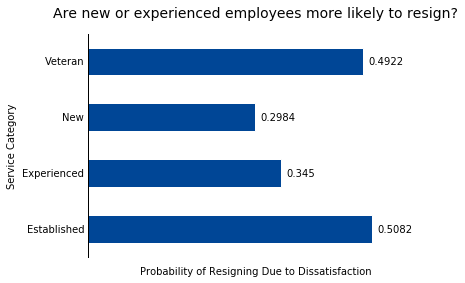

In [46]:
# Plot the results
ax = service_distribution.plot(kind='barh', color=(0/255, 70/255, 150/255), edgecolor='white', legend=False)

def remove_spines():
    for key,spine in ax.spines.items():
        if key == 'left':
            pass
        else:
            spine.set_visible(False)

def add_labels(series):
    for index, value in enumerate(series.iteritems()):
        ax.text(x=value[1]+0.01, y=index, s="{:.4}".format(value[1]), ha='left', va='center')

def format_xaxis():
    ax.set_xlabel('Probability of Resigning Due to Dissatisfaction')
    ax.set_xticklabels([])
    ax.tick_params(top=False, left=False, bottom=False, right=False)


remove_spines()
add_labels(service_distribution['dissatisfied'])
format_xaxis()

ax.set_ylabel('Service Category')
ax.set_title('Are new or experienced employees more likely to resign?', fontsize=14, y=1.05)


plt.show()

*We see that new employees are the least likely to resign due to job dissatisfaction, compared to employees with 7 or more years of service.*

#### Are younger or older employees more likely to resign?

In [47]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each age category
age_distribution = combined_updated.pivot_table(values='dissatisfied', index='age')

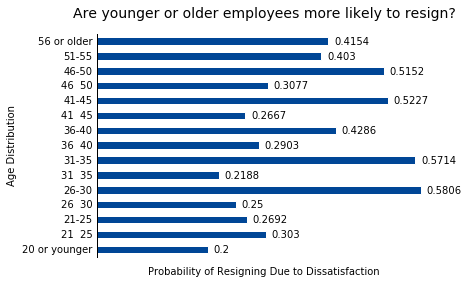

In [48]:
#plot age distribution
ax = age_distribution.plot(kind='barh', color=(0/255, 70/255, 150/255), edgecolor='w', legend=False)

remove_spines()
add_labels(age_distribution['dissatisfied'])

format_xaxis()
ax.set_ylabel('Age Distribution')
ax.set_title('Are younger or older employees more likely to resign?', fontsize=14, y=1.05)

plt.show()

*The plot above tells us that employees below 25 years old are the least likely to resign due to job dissatisfaction unlike employees above 50 years.*

### Conclusion
Upon analysis of the employee exit survey, with focus on respondents who resigned due to job dissatisfaction, we infer that:
- Employees with more than six years of experience are more prone to part ways with the company due to job dissastifaction, while the converse is true for new employees
- In terms of age, employees older than 50 years of age are more likely to exit the company, compared to employees below 25 years old

So its safe to say that more OLDER employess, whether in terms of age or experience, resign due to job dissatisfaction, compared to the YOUNGER employees